<a href="https://colab.research.google.com/github/99527xy/neural-network/blob/main/%E2%80%9CDSA5204_homework1_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preface

Objectives:
1. Learn to use the `keras` API
2. Explore how performance of fully connected neural networks depend on its hyper-parameters
3. Explore the effect of learning rate and batch size on training and testing performance

Due: 4 Feb 2022

In [ ]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(font_scale=1.5)

# The Fashion MNIST Dataset

As mentioned in class the saying,
> *If you model works for MNIST, it may not work for anything else, but if it doesn't work for MNIST, it won't work for anything else*

Here in this notebook you will go beyond the MNIST dataset, albeit only a little bit. We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is designed to replace MNIST as the new minimal dataset to test vision tasks. 

It is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Thus, it is almost exactly like the MNIST dataset for digit recognition, but the classification problem is generally harder.


Here are some example images:
![Fashion MNIST](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

# Importing the Dataset

Just like MNIST, this dataset is found in the `tf.keras.datasets` module.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

The following is a dictionary of labels that will map the y_train/y_test labels into words

In [ ]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
labels_train = [label_dict[u] for u in y_train]
labels_test = [label_dict[u] for u in y_test]

In [ ]:
print(labels_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Ankle boot
9
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Label = Ankle boot')

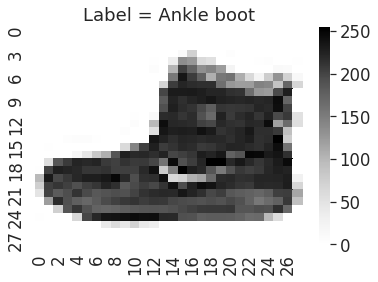

In [ ]:
ax = sns.heatmap(x_train[0], cmap='Greys')
ax.set_title(f'Label = {labels_train[0]}')

# Task 1: Build a Shallow NN for Classification

Build and train a shallow (one-hidden-layer) neural network with 128 hidden nodes to classify these images. Remember to perform appropriate preprocessing steps, such as normalization and one-hot representations.

Evaluate carefully the performance of your training and the final model's performance. Discuss any interesting phenomena you discover.

In [ ]:
x_train = x_train.reshape(-1,784)/255.0
x_test = x_test.reshape(-1,784)/255.0
print(y_train[0])

9


Convert y_train to ont-hot representation


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
print(y_train[0])
y_train.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


(60000, 10)

Building a simple network

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

Compiling and Training models

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=x_train.shape[0],
                    validation_data=(x_test, y_test))

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.3734 - accuracy: 0.0645 - val_loss: 1.8545 - val_accuracy: 0.2781
Epoch 2/200
1/1 [==============================] - 1s 621ms/step - loss: 1.8511 - accuracy: 0.2817 - val_loss: 1.8201 - val_accuracy: 0.4588
Epoch 3/200
1/1 [==============================] - 1s 683ms/step - loss: 1.8133 - accuracy: 0.4612 - val_loss: 1.6720 - val_accuracy: 0.4188
Epoch 4/200
1/1 [==============================] - 1s 602ms/step - loss: 1.6649 - accuracy: 0.4282 - val_loss: 1.5428 - val_accuracy: 0.5189
Epoch 5/200
1/1 [==============================] - 1s 622ms/step - loss: 1.5351 - accuracy: 0.5224 - val_loss: 1.3798 - val_accuracy: 0.5271
Epoch 6/200
1/1 [==============================] - 1s 619ms/step - loss: 1.3732 - accuracy: 0.5378 - val_loss: 1.3967 - val_accuracy: 0.5172
Epoch 7/200
1/1 [==============================] - 1s 637ms/step - loss: 1.3839 - accuracy: 0.5235 - val_loss: 1.5683 - val_accuracy: 0.4795
Epoch 8/200
1/1 

In [ ]:
import pandas as pd

In [ ]:
history = pd.DataFrame(history.history)

In [ ]:
history

,loss,accuracy,val_loss,val_accuracy
0,2.373385,0.064467,1.854541,0.2781
1,1.851145,0.281700,1.820073,0.4588
2,1.813338,0.461167,1.671972,0.4188
3,1.664903,0.428217,1.542778,0.5189
4,1.535083,0.522450,1.379750,0.5271
...,...,...,...,...
195,0.499153,0.821317,0.514050,0.8170
196,0.490564,0.826950,0.513344,0.8154
197,0.489110,0.827583,0.509520,0.8200
198,0.485710,0.829117,0.510671,0.8174


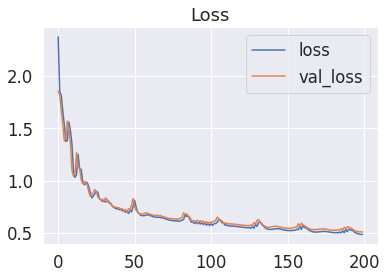

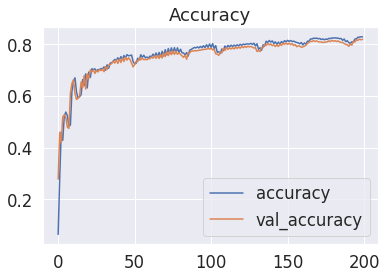

In [ ]:
history.plot(y=['loss', 'val_loss'], title='Loss')
history.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

Evaluation of the model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_predict = model.predict(x_test)
y_test_predict

array([[6.0381855e-05, 3.1737418e-05, 4.7132831e-05, ..., 2.2975881e-01,
        1.0608823e-02, 6.1823797e-01],
       [5.0883845e-04, 5.5708708e-05, 8.7808257e-01, ..., 8.4525218e-06,
        2.5101993e-04, 1.8538700e-05],
       [4.9907285e-05, 9.9979538e-01, 1.5634985e-05, ..., 2.8527958e-07,
        5.0070037e-07, 1.7840121e-07],
       ...,
       [5.9945863e-02, 6.6447050e-05, 3.1723147e-03, ..., 2.9886307e-04,
        7.7702564e-01, 1.3480081e-04],
       [9.3906616e-05, 9.9075878e-01, 1.4302645e-04, ..., 1.8068729e-05,
        8.3058030e-06, 2.9497391e-05],
       [8.8835886e-04, 1.0362400e-03, 2.3142854e-03, ..., 1.9440268e-01,
        3.5321567e-02, 3.2957461e-02]], dtype=float32)

In [ ]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.94      0.96      1000
           2       0.76      0.58      0.66      1000
           3       0.84      0.84      0.84      1000
           4       0.59      0.89      0.70      1000
           5       0.94      0.89      0.92      1000
           6       0.63      0.42      0.51      1000
           7       0.89      0.92      0.90      1000
           8       0.92      0.95      0.93      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cmatrix = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1))

In [ ]:
print(cmatrix)

[[811   5  13  57   8   1  83   0  21   1]
 [  6 945  10  28   8   0   1   0   2   0]
 [ 16   4 584   8 299   1  74   0  14   0]
 [ 26  15   7 839  71   1  36   0   5   0]
 [  0   2  44  23 886   1  37   0   6   1]
 [  0   0   0   1   0 893   0  62   2  42]
 [157   4 102  40 237   2 422   0  36   0]
 [  0   0   0   0   0  33   0 919   0  48]
 [  2   1   7   8   5   6  15   6 950   0]
 [  0   0   0   0   0  12   0  46   1 941]]


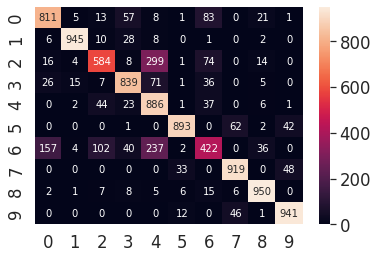

In [ ]:
sns.heatmap(cmatrix, annot=True, fmt="d")

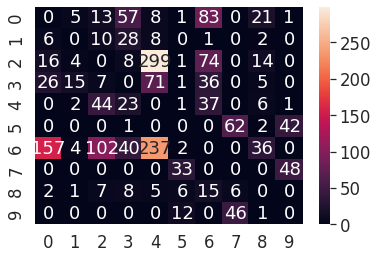

In [ ]:
np.fill_diagonal(cmatrix, 0)
sns.heatmap(cmatrix, annot=True, fmt="d")

# Task 2: Dependence on Hyper-parameters

Now, investigate the dependence of the neural network's performance on some hyper-parameters. In particular, you should investigate the dependence on the following:

1. Number of hidden nodes
2. The activation function
3. Loss functions

Discuss any interesting findings and insights.